In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('../DATA/joined_data.csv')
x = data.drop('quality', axis=1)
y = data['quality']
i_train, i_test = list(StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=7).split(x, y))[0]
x_train, y_train, x_test, y_test = x.iloc[i_train], y.iloc[i_train], x.iloc[i_test], y.iloc[i_test]


In [9]:
lr = Lasso(alpha=1e-15).fit(x_train, y_train)
print(lr.coef_)
print(data.columns[np.argsort(lr.coef_)])


[ 7.86629126e-02 -1.32300522e+00 -1.02203025e-01  4.33461657e-02
 -5.01329384e-01  5.99610232e-03 -2.20541989e-03 -5.78215229e+01
  4.71077779e-01  7.91050819e-01  2.68774710e-01]
Index(['density', 'volatile acidity', 'chlorides', 'citric acid',
       'total sulfur dioxide', 'free sulfur dioxide', 'residual sugar',
       'fixed acidity', 'alcohol', 'pH', 'sulphates'],
      dtype='object')


In [4]:
p = lr.predict(x_test)
print(r2_score(y_test, p))
print(mean_squared_error(y_test, p))


0.28197874178500415
0.5476188557243297


In [5]:
def show_coef(c, names):
    print(c)
    plt.bar(names, c)
    plt.xticks(rotation=90)
    plt.axhline(c.mean(), color='red')
    plt.axhline(np.median(c), color='green')


[0.07866291 1.32300522 0.10220302 0.04334617 0.50132938 0.0059961
 0.00220542 0.47107778 0.79105082 0.26877471]


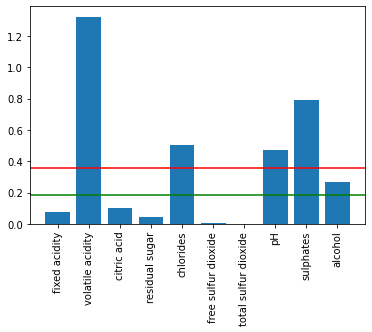

In [6]:
show_coef(abs(lr.coef_)[abs(lr.coef_) != max(abs(lr.coef_))], x.columns[abs(lr.coef_) != max(abs(lr.coef_))])


In [7]:
med = np.median(abs(lr.coef_).mean(axis=0))
useful_columns = x.columns.to_numpy()[abs(lr.coef_) > med]
useful_columns

array(['density'], dtype=object)

In [8]:
data[np.append(useful_columns.tolist(), 'quality')].to_csv('../DATA/regression_remove_data.csv', index=False)